## Program to implement Naïve Bayes Algorithm using any standard dataset available in the public domain and find the accuracy of the algorithm# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import chardet
file="spam.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}


In [3]:
df=pd.read_csv("spam.csv",encoding='Windows-1252')
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# DELETE unwanted columns

In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
df=df.rename(columns={"v1":"label","v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Check the max lengh of sms

print(len(df))

5572


In [7]:
#no.of observations in each label spam,ham
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df['length']=df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# SPLTTING OF DATASET

In [10]:
x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()

# Fitting the data

In [13]:
train_data=count_vector.fit_transform(x_train)
test_data=count_vector.transform(x_test)

# Naive Bayes Algo

In [14]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(train_data,y_train)

MultinomialNB()

In [15]:
print(test_data)

  (0, 816)	1
  (0, 1817)	1
  (0, 3668)	1
  (0, 3805)	1
  (0, 4949)	1
  (0, 5789)	1
  (0, 6561)	1
  (0, 6594)	1
  (0, 6802)	1
  (1, 2629)	1
  (1, 4680)	1
  (1, 6446)	1
  (1, 6995)	1
  (2, 864)	1
  (2, 896)	1
  (2, 952)	1
  (2, 977)	1
  (2, 1890)	1
  (2, 1929)	1
  (2, 2265)	2
  (2, 2572)	1
  (2, 2669)	1
  (2, 2782)	1
  (2, 3119)	1
  (2, 3232)	1
  :	:
  (1391, 6933)	1
  (1391, 7101)	2
  (1392, 279)	1
  (1392, 647)	1
  (1392, 977)	1
  (1392, 1017)	1
  (1392, 1335)	1
  (1392, 1731)	1
  (1392, 2137)	1
  (1392, 2306)	1
  (1392, 2950)	1
  (1392, 3558)	1
  (1392, 4358)	1
  (1392, 4528)	1
  (1392, 4646)	1
  (1392, 5311)	1
  (1392, 5671)	1
  (1392, 5831)	1
  (1392, 6208)	1
  (1392, 6446)	1
  (1392, 6561)	4
  (1392, 6719)	1
  (1392, 7192)	1
  (1392, 7305)	1
  (1392, 7310)	1


In [16]:
y_pred=classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


# Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1193    3]
 [  16  181]]


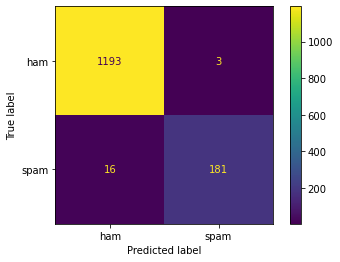

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

# ACCURACY

In [19]:
training_score=classifier.score(train_data,y_train)
test_score=classifier.score(test_data,y_test)
print(training_score)
print(test_score)

0.9928212491026561
0.9863603732950467


In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score:{}'.format(accuracy_score(y_test,y_pred)))
print('Precision score:{}'.format(precision_score(y_test,y_pred,pos_label="spam")))
print('Recall score:{}'.format(recall_score(y_test,y_pred,pos_label="spam")))
print('F1 score:{}'.format(f1.score(y_test,y_pred,pos_label="spam")))

Accuracy score:0.9863603732950467
Precision score:0.9836956521739131
Recall score:0.9187817258883249


NameError: name 'f1' is not defined